Importing Data

In [509]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

def safelog(x):
    return(np.log(x + 1e-300))

In [510]:
# read data into memory
data_set = pd.read_csv("./titanic_data/train.csv")
test_data = pd.read_csv("./titanic_data/test.csv")
train_data = data_set.copy()
test_data = test_data.copy()

In [511]:
train_data.info()
# Some problems with Age, Cabin, and Embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [512]:
train_data.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [513]:
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)

C:\Users\babll\AppData\Local\Temp\ipykernel_12428\1849631878.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
C:\Users\babll\AppData\Local\Temp\ipykernel_12428\1849631878.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [514]:
# transform the string data into numbers
# male = 0, female = 1 
train_data['Sex'].replace('male', 0, inplace=True)
train_data['Sex'].replace("female", 1, inplace=True)

test_data['Sex'].replace('male', 0, inplace=True)
test_data['Sex'].replace("female", 1, inplace=True)


C:\Users\babll\AppData\Local\Temp\ipykernel_12428\3354605890.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Sex'].replace('male', 0, inplace=True)
C:\Users\babll\AppData\Local\Temp\ipykernel_12428\3354605890.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [515]:
col = 'Survived'
train_data = train_data[[c for c in train_data.columns if c != col] + [col]]

In [516]:
train_data.drop("Name", axis=1, inplace=True)
test_data.drop("Name", axis=1, inplace=True)

train_data.drop("Cabin", axis=1, inplace=True)
test_data.drop("Cabin", axis=1, inplace=True)

train_data.drop("Ticket", axis=1, inplace=True)
test_data.drop("Ticket", axis=1, inplace=True)


In [517]:
embarked_map = {
    'C': 0,
    'Q': 1,
    'S': 2
}
train_data['Embarked'].replace(embarked_map, inplace=True)
test_data['Embarked'].replace(embarked_map, inplace=True)


C:\Users\babll\AppData\Local\Temp\ipykernel_12428\2760109133.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Embarked'].replace(embarked_map, inplace=True)
C:\Users\babll\AppData\Local\Temp\ipykernel_12428\2760109133.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['Emb

In [518]:
train_data["Age"] = train_data["Age"].astype(float, copy=False)
test_data["Age"] = test_data["Age"].astype(float, copy=False)
train_data = train_data.round(2)
test_data = test_data.round(2)



In [519]:
labels_df = pd.read_csv("./titanic_data/gender_submission.csv")
test_data["Survived"] = labels_df["Survived"]



In [520]:
train_data["Fare"].fillna(train_data["Fare"].mean(), inplace=True)
test_data["Fare"].fillna(test_data["Fare"].mean(), inplace=True)

train_data["Embarked"].fillna(train_data["Embarked"].median(), inplace=True)



C:\Users\babll\AppData\Local\Temp\ipykernel_12428\1288983014.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data["Fare"].fillna(train_data["Fare"].mean(), inplace=True)
C:\Users\babll\AppData\Local\Temp\ipykernel_12428\1288983014.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [521]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
x_train = train_data.drop(["PassengerId","Survived"], axis=1).values
y_train = train_data["Survived"].values
x_test = test_data.drop(["PassengerId","Survived"], axis=1).values
y_test = test_data["Survived"].values


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

y_test.shape



(418,)

## Sigmoid Function

$\textrm{sigmoid}(\boldsymbol{w}^{\top} \boldsymbol{x} + w_{0}) = \dfrac{1}{1 + \exp\left[-(\boldsymbol{w}^{\top} \boldsymbol{x} + w_{0})\right]}$


In [604]:
# define the sigmoid function
def sigmoid(X, w, w0):
    return(1 / (1 + np.exp(-(np.matmul(X, w) + w0))))

In [605]:
def safelog(x):
    return(np.log(x + 1e-300))

## Gradient Functions

\begin{align*}
\dfrac{\partial \textrm{Error}}{\partial \boldsymbol{w}} &= -\sum\limits_{i = 1}^{N} (y_{i} - \hat{y}_{i})\boldsymbol{x}_{i} \\
\dfrac{\partial \textrm{Error}}{\partial w_{0}} &= -\sum\limits_{i = 1}^{N} (y_{i} - \hat{y}_{i}) 
\end{align*}

In [606]:
# define the gradient functions
def gradient_w(X, y_truth, y_predicted):
    return(-np.matmul(X.T, y_truth - y_predicted))

def gradient_w0(y_truth, y_predicted):
    return(-np.sum(y_truth - y_predicted))

## Algorithm Parameters

In [625]:
# set learning parameters
eta = 0.001
epsilon = 0.0001

## Iterative Algorithm

$\textrm{Error} = -\sum\limits_{i = 1}^{N} \left[ y_{i}\log(\hat{y}_{i}) + (1 - y_{i}) \log(1 - \hat{y}_{i}) \right]$

In [626]:
np.random.seed(421)
# initialize weights
# Xavier initialization for weights
limit = np.sqrt(1 / x_train.shape[1])
w = np.random.uniform(-limit, limit, x_train.shape[1])
w0 = np.random.uniform(-0.1, 0.1, 1)

In [627]:
# learn w and w0 using gradient descent
iteration = 1
objective_values = []
while True:
    y_predicted = sigmoid(x_train, w, w0) 
    objective_values = np.append(objective_values,
                                 -np.sum(y_train * safelog(y_predicted) + 
                                         (1 - y_train) * safelog(1 - y_predicted)))
    
    if iteration == 1000:
        break   

    w_old = w
    w0_old = w0

    w = w - eta * gradient_w(x_train, y_train, y_predicted)
    w0 = w0 - eta * gradient_w0(y_train, y_predicted)

    if np.sqrt((w0 - w0_old)**2 + np.sum((w - w_old)**2)) < epsilon:
        break

    iteration = iteration + 1
print(w)
print(w0)

[-2.14441363  2.70759271 -2.66702725 -1.81662157 -0.65948945  0.51253836
 -0.46332988]
[1.27029602]


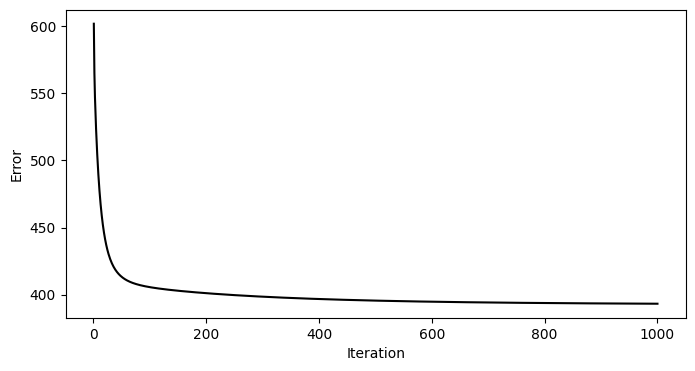

In [629]:
# plot objective function during iterations
plt.figure(figsize = (8, 4))
plt.plot(range(1, iteration + 1), objective_values, "k-")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.savefig("training_loss.pdf")
plt.show()


In [611]:
# calculate confusion matrix
y_predicted = 1 * (y_predicted > 0.5)
confusion_matrix = pd.crosstab(y_predicted.T, y_train.T, 
                               rownames = ["y_pred"], 
                               colnames = ["y_truth"])
print(confusion_matrix)

y_truth    0    1
y_pred           
0        473  101
1         76  241


In [612]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train, y_predicted)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.8013


## Test Data

In [546]:
def make_predictions(x_test, w, w0):
    y_predicted = sigmoid(x_test, w, w0)
    y_predicted = 1 * (y_predicted > 0.5)
    return(y_predicted)

In [547]:
y_test_hat = make_predictions(x_test, w, w0)

(418,)


In [533]:
print(y_test_hat)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [548]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_test_hat)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.9402


In [535]:
# calculate confusion matrix
y_predicted = 1 * (y_test_hat > 0.5)
confusion_matrix = pd.crosstab(y_test_hat.T, y_test.T, 
                               rownames = ["y_pred"], 
                               colnames = ["y_truth"])
print(confusion_matrix)

y_truth    0    1
y_pred           
0        252   11
1         14  141


In [536]:
labels_df['PassengerId']
y_test_hat.shape

(418,)

In [537]:
# Create submission file
submission = pd.DataFrame({
    'PassengerId': labels_df['PassengerId'].values,
    'Survived': y_test_hat
})

submission.to_csv('submission.csv', index=False)

In [630]:
!git init

Initialized empty Git repository in C:/Users/babll/OneDrive - Koc Universitesi/Masaüstü/Uni/Internship/OBSS/.git/


In [633]:
git add .
git commit -m "Initial commit"

'cwd' is not recognized as an internal or external command,
operable program or batch file.
